In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train[0].shape

(32, 32, 3)

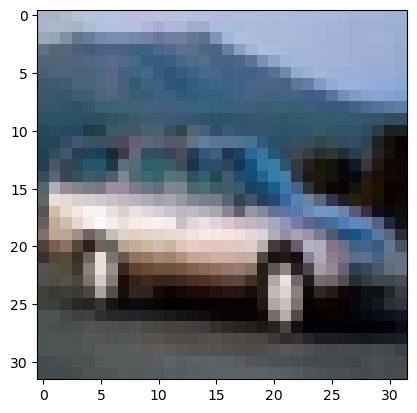

In [4]:
import matplotlib.pyplot as plt

plt.imshow(x_train[4])
plt.show()

In [5]:
x_train.max()

255

In [6]:
x_train = x_train/255
x_test = x_test/255

## Labels

In [7]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)## Labels
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

----------
# Building the Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
# model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
#  POOLING LAYER
# model.add(MaxPool2D(pool_size=(2, 2)))




# FLATTEN 
model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))





# LAST LAYER 
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_7 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                      

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [20]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 74s 47ms/step - loss: 1.5313 - accuracy: 0.4564 - val_loss: 1.2987 - val_accuracy: 0.5350
Epoch 2/15
1563/1563 [==============================] - 74s 47ms/step - loss: 1.2113 - accuracy: 0.5770 - val_loss: 1.3968 - val_accuracy: 0.5347
Epoch 3/15
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0676 - accuracy: 0.6322 - val_loss: 1.1314 - val_accuracy: 0.6178
Epoch 4/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9690 - accuracy: 0.6657 - val_loss: 1.0503 - val_accuracy: 0.6425
Epoch 5/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8897 - accuracy: 0.6943 - val_loss: 1.1072 - val_accuracy: 0.6328
Epoch 6/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8194 - accuracy: 0.7193 - val_loss: 1.2449 - val_accuracy: 0.6138
Epoch 7/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7569 - accuracy: 0.7443 - val_loss: 1.0817 -

<AxesSubplot:>

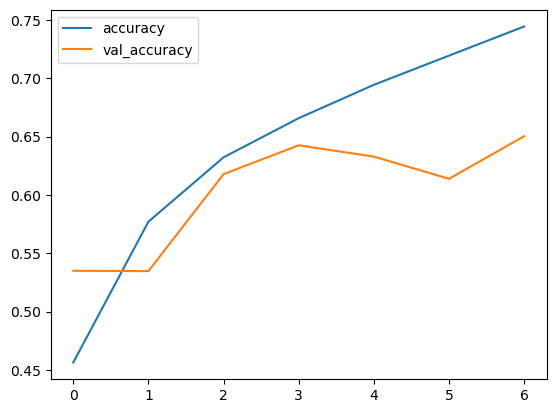

In [21]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

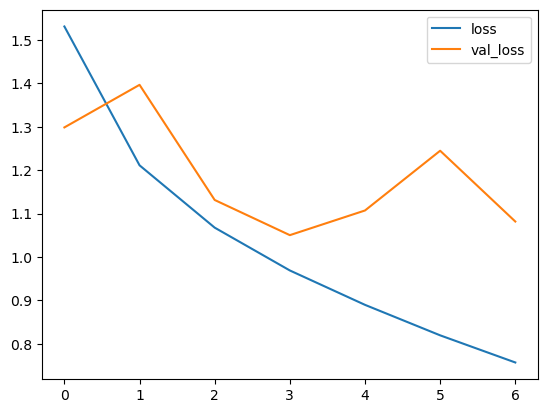

In [22]:
losses[['loss','val_loss']].plot()

In [23]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0817489624023438, 0.6503000259399414]


In [49]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = np.argmax(model.predict(x_test), axis=-1).reshape(-1,1)
print(classification_report(y_test,predictions))

313/313 [==============================] - 5s 15ms/step
              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1000
           1       0.76      0.78      0.77      1000
           2       0.66      0.40      0.50      1000
           3       0.47      0.46      0.46      1000
           4       0.48      0.76      0.59      1000
           5       0.62      0.43      0.51      1000
           6       0.80      0.64      0.71      1000
           7       0.70      0.75      0.72      1000
           8       0.78      0.76      0.77      1000
           9       0.68      0.81      0.74      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



In [50]:
confusion_matrix(y_test,predictions)

array([[724,  30,  32,  14,  48,   7,   7,  13,  71,  54],
       [ 16, 778,   7,  12,   5,   4,   6,   4,  30, 138],
       [ 96,  14, 404,  70, 224,  66,  42,  53,  11,  20],
       [ 31,  17,  45, 459, 156, 116,  51,  64,  24,  37],
       [ 36,   5,  25,  51, 759,  18,  22,  69,  12,   3],
       [ 21,   7,  37, 218, 121, 431,  26,  93,  23,  23],
       [  9,  15,  29,  83, 155,  19, 638,   8,  11,  33],
       [ 16,   7,  19,  44,  97,  31,   5, 747,   5,  29],
       [ 96,  59,   4,  13,  16,   5,   2,   4, 756,  45],
       [ 29,  86,   6,  17,  10,   1,   2,  12,  30, 807]], dtype=int64)

<AxesSubplot:>

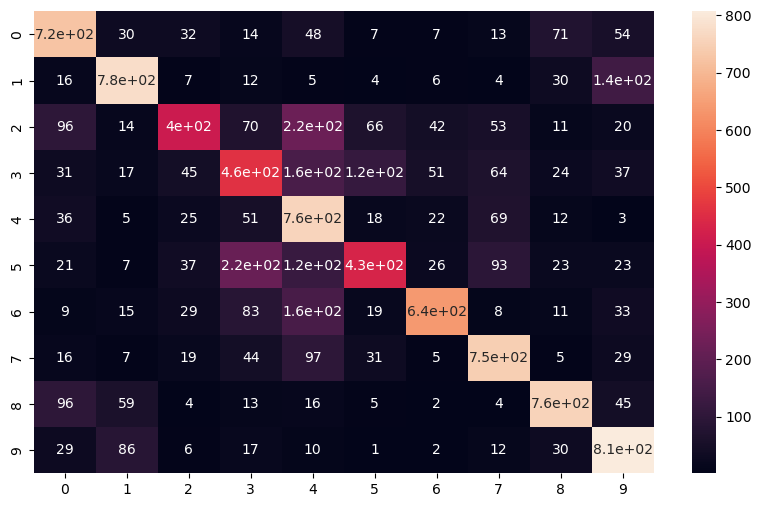

In [51]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)# Predicting a given image

# Predicting a given image

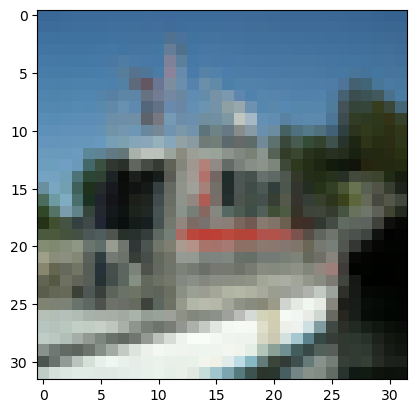

In [64]:
my_image = x_test[600]
plt.imshow(my_image)

In [65]:
np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1)#.reshape(-1,1)

1/1 [==============================] - 0s 23ms/step


array([8], dtype=int64)

In [66]:
# 8 is ship
# https://www.cs.toronto.edu/~kriz/cifar.html